In [ ]:
# @title Install YOLOv8
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.6 MB/s eta 0:00:00


In [ ]:

# @title Mount Drive

# please make sure you mount your drive with the shortcut to khushi's drive with all the files 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Imports
import os, random, shutil
from glob import glob
from datetime import datetime
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# @title paths
# Base paths (Drive)
base_dir = "/content/drive/MyDrive/yolo_airstrip_dataset"
img_dir = os.path.join(base_dir, "images/train")
lbl_dir = os.path.join(base_dir, "labels/train")

# Train/val split paths
train_img_dir = os.path.join(base_dir, "images/train_split")
val_img_dir   = os.path.join(base_dir, "images/val")
train_lbl_dir = os.path.join(base_dir, "labels/train_split")
val_lbl_dir   = os.path.join(base_dir, "labels/val")

# Create output folders
for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)


In [ ]:
# @title Train/Val split

# following code makes an 80-20 train test split that we will use 
# note these are respectively stored in a the yolo_airstrip_dataset file itself made from the convertor code that creates the bounds from the masks 

image_paths = sorted(glob(os.path.join(img_dir, "*.png")))
random.seed(42) # fiddle around with the seed if needed for different splits
random.shuffle(image_paths)

split_index = int(0.8 * len(image_paths))
train_files = image_paths[:split_index]
val_files   = image_paths[split_index:]

for img_path in train_files:
    base = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join(train_img_dir, base))
    shutil.copy(os.path.join(lbl_dir, base.replace(".png", ".txt")), os.path.join(train_lbl_dir, base.replace(".png", ".txt")))

for img_path in val_files:
    base = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join(val_img_dir, base))
    shutil.copy(os.path.join(lbl_dir, base.replace(".png", ".txt")), os.path.join(val_lbl_dir, base.replace(".png", ".txt")))

print(f"✅ Train: {len(train_files)} images")
print(f"✅ Val: {len(val_files)} images")


✅ Train: 708 images
✅ Val: 177 images


In [ ]:
# @title creating the dataset.yaml
yaml_path = os.path.join(base_dir, "dataset.yaml")
yaml_content = f"""
path: {base_dir}
train: images/train_split
val: images/val
nc: 1
names: ['airstrip']
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content.strip())

print("✅ dataset.yaml created at:", yaml_path)

✅ dataset.yaml created at: /content/drive/MyDrive/yolo_airstrip_dataset/dataset.yaml


In [ ]:
# @title Training !!!!! (with timestamped output dir in Drive - done so we can keep track of different runs)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = f"/content/drive/MyDrive/yolo_models/airstrip_model_{timestamp}"

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"✅ Using device: {device}")

model = YOLO('yolov8n.pt')
model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    device=device,
    project=save_dir,
    name='',
    exist_ok=True
)


✅ Using device: cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 98.5MB/s]


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo_airstrip_dataset/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

100%|██████████| 755k/755k [00:00<00:00, 41.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 138MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.4 ms, read: 106.5±61.9 MB/s, size: 341.6 KB)


train: Scanning /content/drive/MyDrive/yolo_airstrip_dataset/labels/train_split... 770 images, 224 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:37<00:00, 20.52it/s]


train: New cache created: /content/drive/MyDrive/yolo_airstrip_dataset/labels/train_split.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 4.5±8.5 ms, read: 74.8±69.1 MB/s, size: 357.4 KB)


val: Scanning /content/drive/MyDrive/yolo_airstrip_dataset/labels/val... 246 images, 59 backgrounds, 0 corrupt: 100%|██████████| 246/246 [00:31<00:00,  7.76it/s]

val: New cache created: /content/drive/MyDrive/yolo_airstrip_dataset/labels/val.cache


Plotting labels to /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G      1.952      4.447      1.627          5        640: 100%|██████████| 49/49 [00:22<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        246        187    0.00195       0.77     0.0279     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.75G       1.87       3.38      1.582          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        246        187      0.163       0.17      0.089     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.75G      1.901      3.044      1.625          4        640: 100%|██████████| 49/49 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]


                   all        246        187      0.295      0.118     0.0982     0.0437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.77G      1.899      2.639       1.62          5        640: 100%|██████████| 49/49 [00:20<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]


                   all        246        187       0.42      0.257      0.244     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.79G      1.941      2.422       1.64          3        640: 100%|██████████| 49/49 [00:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all        246        187      0.301      0.321      0.282      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.79G      1.918      2.336      1.649          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        246        187      0.505      0.417      0.416      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.79G        1.8      2.221      1.557          2        640: 100%|██████████| 49/49 [00:20<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]


                   all        246        187      0.584      0.428      0.464      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.8G      1.782      2.036      1.578          4        640: 100%|██████████| 49/49 [00:19<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        246        187      0.478      0.358      0.379      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.8G       1.77      1.942      1.545          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]


                   all        246        187      0.521      0.439      0.412      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.81G      1.733      1.857      1.503          1        640: 100%|██████████| 49/49 [00:20<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


                   all        246        187      0.535      0.471      0.463      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.82G      1.683      1.823      1.485          1        640: 100%|██████████| 49/49 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        246        187      0.575      0.529      0.552      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.82G      1.643      1.775      1.457          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]


                   all        246        187      0.532       0.46      0.457      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.84G      1.675      1.799      1.451          3        640: 100%|██████████| 49/49 [00:20<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        246        187      0.656      0.582      0.612      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.84G      1.625      1.719      1.456          3        640: 100%|██████████| 49/49 [00:19<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        246        187      0.565      0.476      0.497       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G      1.617      1.717      1.453          1        640: 100%|██████████| 49/49 [00:19<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        246        187      0.581      0.563      0.569      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      1.583      1.605      1.403          3        640: 100%|██████████| 49/49 [00:18<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        246        187      0.644      0.599      0.622       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.86G      1.541      1.594      1.401          1        640: 100%|██████████| 49/49 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        246        187      0.702      0.554      0.622      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.86G      1.592      1.617      1.402          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]

                   all        246        187      0.677       0.61      0.668      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.87G      1.543      1.583      1.401          6        640: 100%|██████████| 49/49 [00:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        246        187      0.742      0.599      0.708      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.87G       1.53       1.59      1.393          4        640: 100%|██████████| 49/49 [00:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        246        187      0.586      0.524      0.591      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.87G      1.449      1.488      1.345          1        640: 100%|██████████| 49/49 [00:20<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]

                   all        246        187      0.652      0.671      0.686       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.87G      1.458      1.551      1.314          0        640: 100%|██████████| 49/49 [00:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        246        187      0.743       0.65      0.749      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.87G      1.456      1.478      1.345          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        246        187      0.792      0.658      0.775       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.87G      1.438      1.383      1.298          4        640: 100%|██████████| 49/49 [00:24<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]

                   all        246        187      0.731      0.701      0.745      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.87G      1.394       1.34      1.284          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        246        187      0.815      0.684      0.782      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.87G      1.403      1.355      1.289          4        640: 100%|██████████| 49/49 [00:18<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        246        187      0.745      0.717      0.806      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.87G       1.42      1.366      1.285          0        640: 100%|██████████| 49/49 [00:19<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        246        187      0.806      0.631      0.728      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.87G       1.43      1.439      1.298          3        640: 100%|██████████| 49/49 [00:19<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        246        187      0.773      0.684      0.765      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.87G      1.356      1.251      1.253          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        246        187       0.76      0.695      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.87G      1.375      1.265       1.24          3        640: 100%|██████████| 49/49 [00:20<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        246        187      0.752      0.727      0.789      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.87G      1.327      1.288      1.252          3        640: 100%|██████████| 49/49 [00:18<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        246        187      0.757      0.768       0.82      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.87G      1.318      1.178      1.249          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        246        187      0.803      0.684      0.793      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.87G      1.276      1.164      1.224          4        640: 100%|██████████| 49/49 [00:19<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        246        187      0.766      0.743      0.794      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.87G      1.305      1.155      1.307          1        640: 100%|██████████| 49/49 [00:18<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        246        187      0.764      0.781      0.825      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.87G      1.288      1.199      1.225          1        640: 100%|██████████| 49/49 [00:20<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        246        187      0.782      0.786      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.87G      1.272      1.134      1.204          3        640: 100%|██████████| 49/49 [00:18<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        246        187      0.797      0.797      0.846      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.87G      1.258      1.134      1.196          4        640: 100%|██████████| 49/49 [00:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        246        187       0.83      0.809      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.87G      1.272      1.116      1.201          2        640: 100%|██████████| 49/49 [00:21<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]

                   all        246        187      0.823       0.82      0.853      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.87G      1.228      1.073      1.198          1        640: 100%|██████████| 49/49 [00:18<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        246        187      0.818      0.768      0.847      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.87G        1.2      1.096      1.204          4        640: 100%|██████████| 49/49 [00:19<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        246        187      0.764      0.829      0.857      0.597


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.87G      1.074     0.9066      1.162          1        640: 100%|██████████| 49/49 [00:22<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        246        187      0.858       0.84      0.896      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.87G      1.093     0.8949      1.148          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        246        187      0.825       0.85       0.89       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.87G      1.076     0.8282      1.134          1        640: 100%|██████████| 49/49 [00:18<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        246        187      0.876      0.797      0.903       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.87G      1.034     0.7738      1.114          2        640: 100%|██████████| 49/49 [00:20<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]

                   all        246        187      0.836      0.845      0.904      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.87G      1.011     0.8393      1.127          2        640: 100%|██████████| 49/49 [00:18<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        246        187      0.839      0.898      0.921      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.87G      1.006     0.7458      1.106          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        246        187      0.852      0.888      0.917      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.87G      1.029     0.8363      1.112          1        640: 100%|██████████| 49/49 [00:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        246        187      0.853      0.903      0.917      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.87G     0.9544     0.7082      1.063          1        640: 100%|██████████| 49/49 [00:19<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        246        187       0.82      0.899      0.916      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.87G     0.9461      0.705      1.059          2        640: 100%|██████████| 49/49 [00:20<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        246        187      0.881      0.873      0.921      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.87G      0.935     0.6814      1.066          2        640: 100%|██████████| 49/49 [00:19<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        246        187      0.884      0.893      0.926      0.679



50 epochs completed in 0.329 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        246        187      0.885      0.893      0.926       0.68
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7faf21275790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# ✅ Evaluate

# this was for my reference when creating the codes you can remove it 
metrics = model.val()
print("📊 mAP@0.5:", metrics.box.map50)

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 146.1±51.7 MB/s, size: 385.9 KB)


val: Scanning /content/drive/MyDrive/yolo_airstrip_dataset/labels/val.cache... 246 images, 59 backgrounds, 0 corrupt: 100%|██████████| 246/246 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.53it/s]


                   all        246        187      0.884      0.893      0.927       0.68
Speed: 2.6ms preprocess, 7.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_models/airstrip_model_20250731_164843/train
📊 mAP@0.5: 0.9266559436073262


Saving id_338.png to id_338.png

image 1/1 /content/id_338.png: 640x640 2 airstrips, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


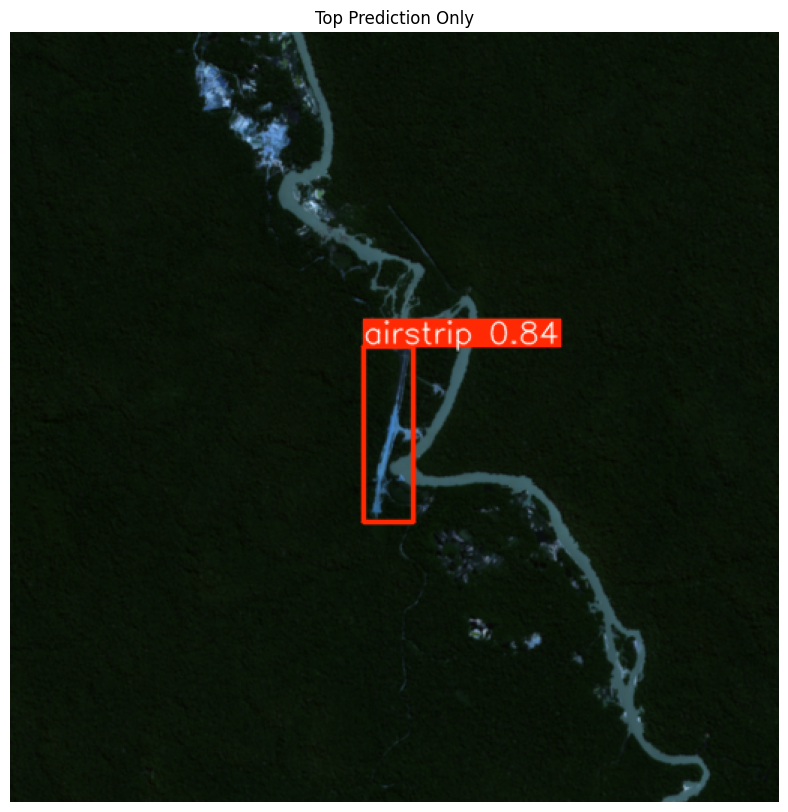

In [ ]:
#@title Predict on 1 image
# Upload an image and run top-1 prediction
# the image must be a png file and the model will return the highest confidence box

from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()
uploaded_image_path = next(iter(uploaded))

# Load the trained model from Drive
model_path = os.path.join(save_dir, "train/weights/best.pt")
model = YOLO(model_path)

# Predict
results = model(uploaded_image_path)

# Show only highest confidence box
for r in results:
    if len(r.boxes) == 0:
        print("❌ No detections found.")
        continue
    max_idx = r.boxes.conf.argmax()
    r.boxes = r.boxes[max_idx:max_idx+1]
    im_array = r.plot()
    plt.figure(figsize=(10, 10))
    plt.imshow(im_array)
    plt.axis('off')
    plt.title("Top Prediction Only")
    plt.show()
